In [1]:
getwd()

[1] "/home/senlyu/git/TravelersCompetition"

In [2]:
setwd('/home/senlyu/git/TravelersCompetition/data')

In [3]:
install.packages("caTools")
install.packages("ROCR")
install.packages("caret")
install.packages("glmnet")
install.packages("e1071")

Installing package into ‘/home/senlyu/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/senlyu/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/senlyu/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/senlyu/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/senlyu/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [4]:
train = read.csv('Train.csv')
train[1:10]

id,tenure,claim.ind,n.adults,n.children,ni.gender,ni.marital.status,premium,sales.channel,coverage.type
1,12,0,4,2,F,1,895.6156,Broker,B
2,18,0,2,0,M,1,828.3324,Broker,C
3,4,0,2,0,M,0,1003.0617,Phone,B
4,16,0,1,0,F,1,1092.4482,Broker,C
5,14,0,3,3,M,1,885.4742,Phone,A
6,14,0,3,0,F,0,897.3957,Broker,C
7,19,0,1,1,F,0,855.0103,Phone,A
8,13,1,1,0,M,0,789.1410,Broker,C
9,11,1,1,3,F,1,986.1079,Broker,C
10,14,0,4,1,M,1,991.8100,Broker,C



 150  201  500  800  801  850  980 
1171  359 2011 1328  104 1791  810 

       id           tenure        claim.ind         n.adults    
 Min.   :   1   Min.   : 0.00   Min.   :0.0000   Min.   :1.000  
 1st Qu.:1895   1st Qu.: 6.00   1st Qu.:0.0000   1st Qu.:1.000  
 Median :3790   Median :13.00   Median :0.0000   Median :2.000  
 Mean   :3790   Mean   :11.71   Mean   :0.2034   Mean   :2.134  
 3rd Qu.:5685   3rd Qu.:16.00   3rd Qu.:0.0000   3rd Qu.:3.000  
 Max.   :7582   Max.   :30.00   Max.   :1.0000   Max.   :9.000  
                NA's   :2       NA's   :10       NA's   :5      
   n.children     ni.gender   ni.marital.status    premium       sales.channel
 Min.   : 0.000   F   :3610   Min.   :0.0000    Min.   : 645.8   Broker:4358  
 1st Qu.: 0.000   M   :3956   1st Qu.:0.0000    1st Qu.: 845.8   Online: 646  
 Median : 1.000   NA's:  12   Median :1.0000    Median : 901.4   Phone :2562  
 Mean   : 1.781               Mean   :0.7168    Mean   : 901.4   NA's  :  12  
 3rd Qu.: 3.000               3rd Qu.:1.0000    3rd Qu.: 956.2                
 Max. 

'data.frame':	7578 obs. of  19 variables:
 $ id               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ tenure           : int  12 18 4 16 14 14 19 13 11 14 ...
 $ claim.ind        : int  0 0 0 0 0 0 0 1 1 0 ...
 $ n.adults         : int  4 2 2 1 3 3 1 1 1 4 ...
 $ n.children       : int  2 0 0 0 3 0 1 0 3 1 ...
 $ ni.gender        : Factor w/ 2 levels "F","M": 1 2 2 1 2 1 1 2 1 2 ...
 $ ni.marital.status: int  1 1 0 1 1 0 0 0 1 1 ...
 $ premium          : num  896 828 1003 1092 885 ...
 $ sales.channel    : Factor w/ 3 levels "Broker","Online",..: 1 1 3 1 3 1 3 1 1 1 ...
 $ coverage.type    : Factor w/ 3 levels "A","B","C": 2 3 2 3 1 3 1 3 3 3 ...
 $ dwelling.type    : Factor w/ 3 levels "Condo","House",..: 1 3 2 1 3 2 3 1 3 2 ...
 $ len.at.res       : num  13 15 10 22 18 19 21 10 18 16 ...
 $ credit           : Factor w/ 3 levels "high","low","medium": 1 1 3 1 2 1 1 1 3 1 ...
 $ house.color      : Factor w/ 4 levels "blue","red","white",..: 1 3 1 2 3 3 3 1 2 3 ...
 $ ni.age           : num 

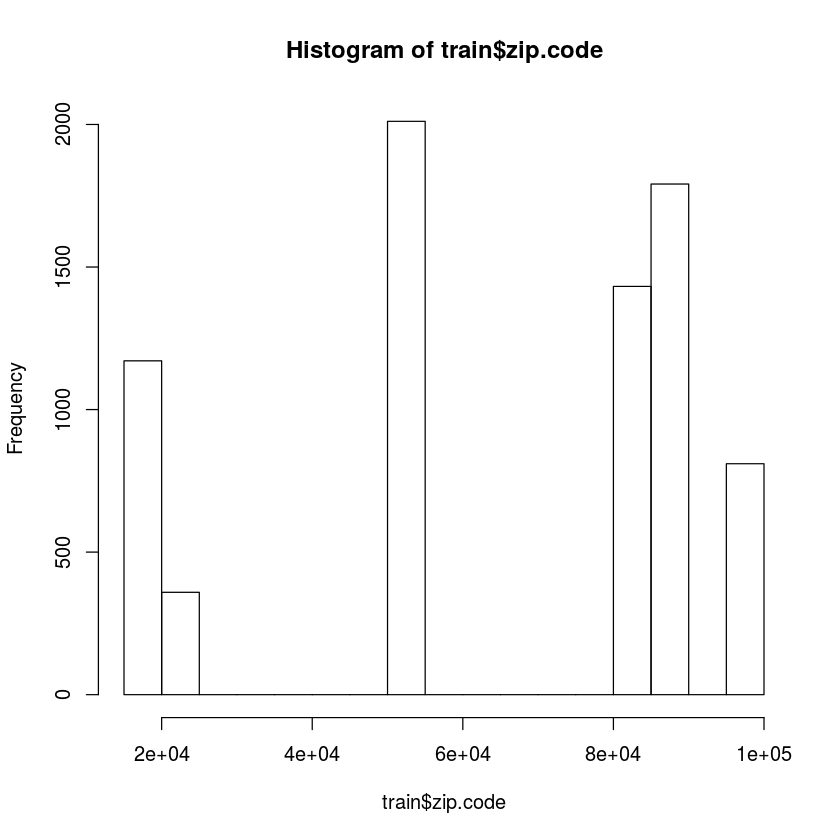

In [5]:
train$year =as.factor(train$year)

##################zip code (assign based on first three digits)
train$area = NA
hist(train$zip.code)
table(train$zip.code %/% 100)
train$area[train$zip.code %/% 100 ==150]="PA"
train$area[train$zip.code %/% 100 ==201]="DC"
train$area[train$zip.code %/% 100 ==500]="IA"
train$area[train$zip.code %/% 100 ==800]="CO"
train$area[train$zip.code %/% 100 ==801]="CO"
train$area[train$zip.code %/% 100 ==850]="AZ"
train$area[train$zip.code %/% 100 ==980]="wA"

train$area =as.factor(train$area)
train$zip.code=as.factor(train$zip.code)
train =train[,c(1:17,19,18)]
summary(train)
str(train)

In [6]:
head(train)

id,tenure,claim.ind,n.adults,n.children,ni.gender,ni.marital.status,premium,sales.channel,coverage.type,dwelling.type,len.at.res,credit,house.color,ni.age,year,zip.code,area,cancel
1,12,0,4,2,F,1,895.6156,Broker,B,Condo,13,high,blue,47,2013,80020,CO,0
2,18,0,2,0,M,1,828.3324,Broker,C,Tenant,15,high,white,47,2013,50025,IA,0
3,4,0,2,0,M,0,1003.0617,Phone,B,House,10,medium,blue,30,2013,50025,IA,0
4,16,0,1,0,F,1,1092.4482,Broker,C,Condo,22,high,red,38,2013,80026,CO,0
5,14,0,3,3,M,1,885.4742,Phone,A,Tenant,18,low,white,49,2013,50054,IA,0
6,14,0,3,0,F,0,897.3957,Broker,C,House,19,high,white,40,2013,85076,AZ,0


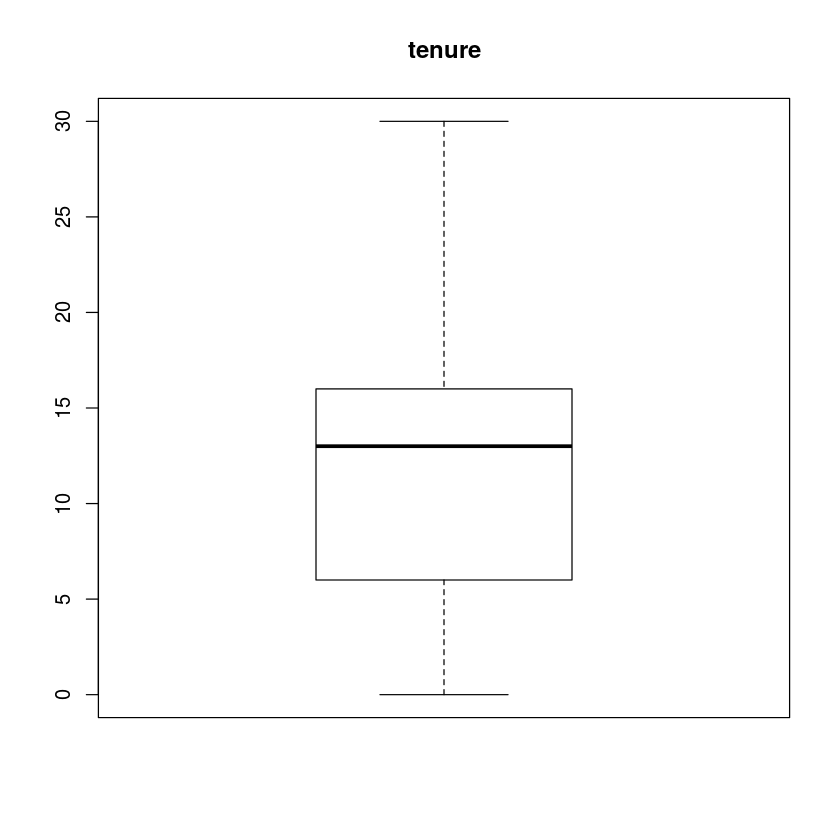

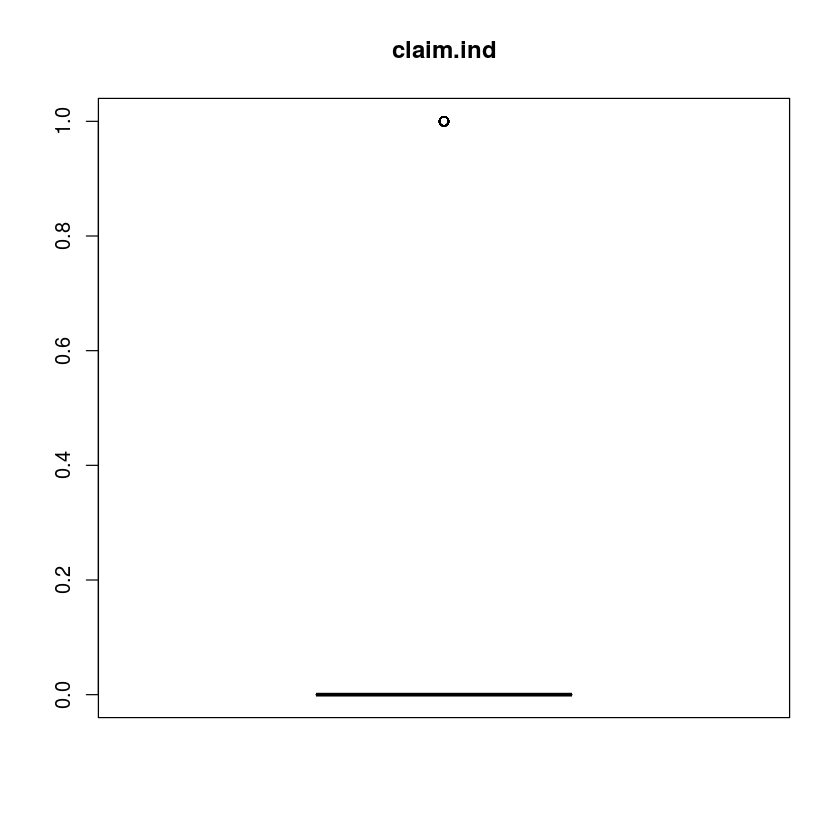

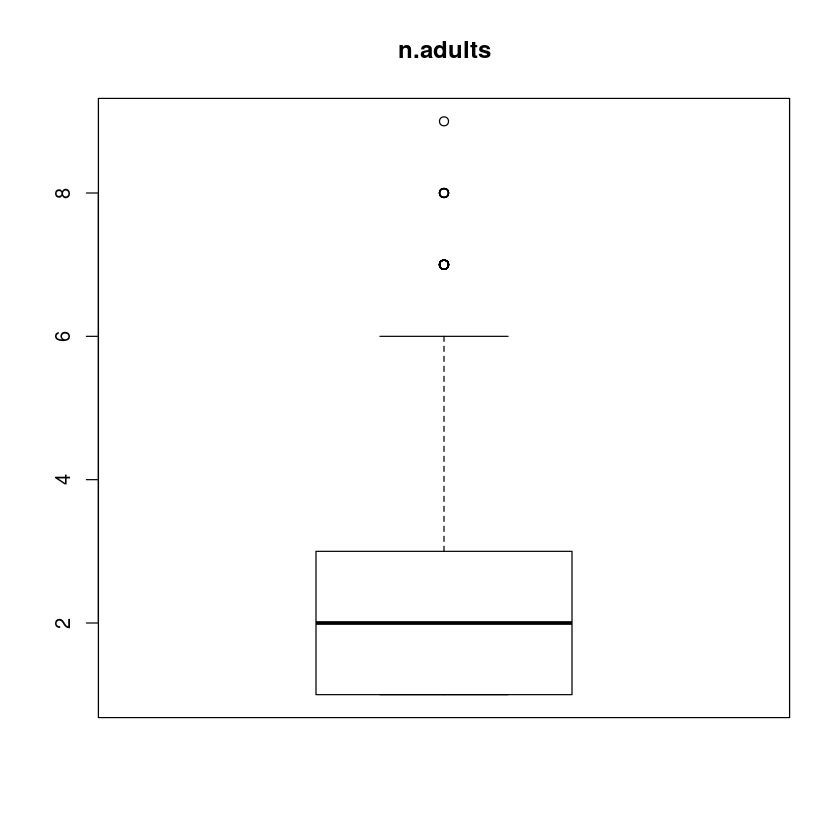

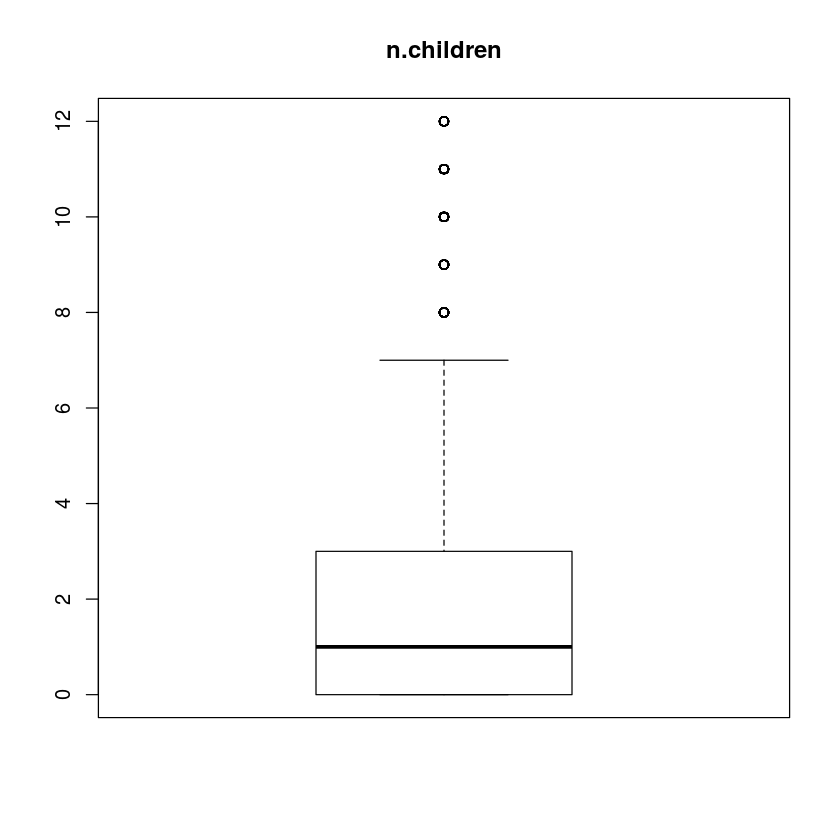

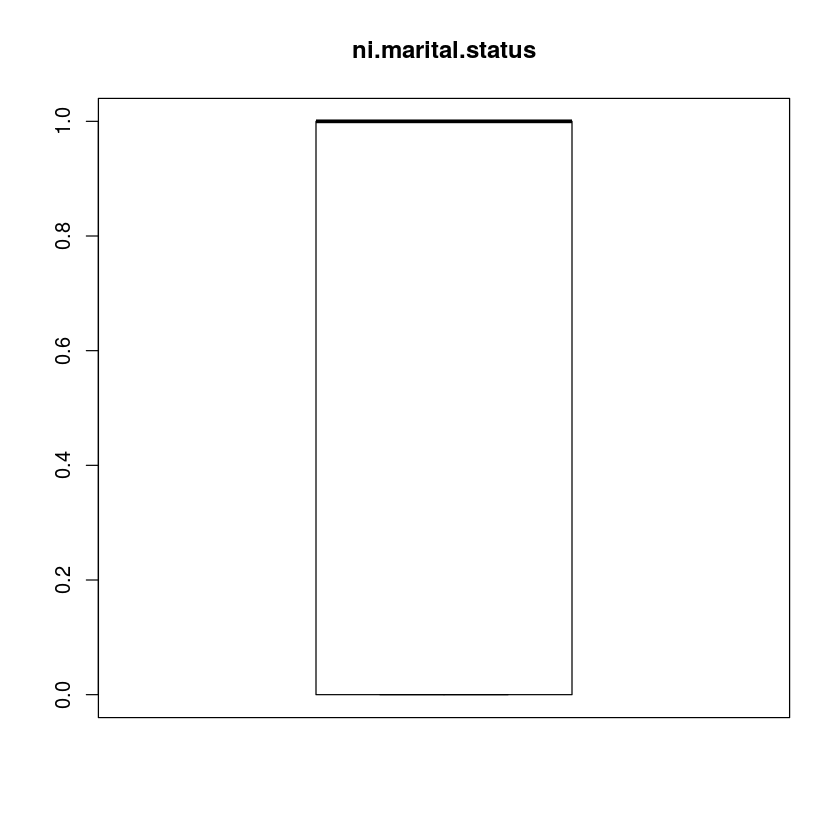

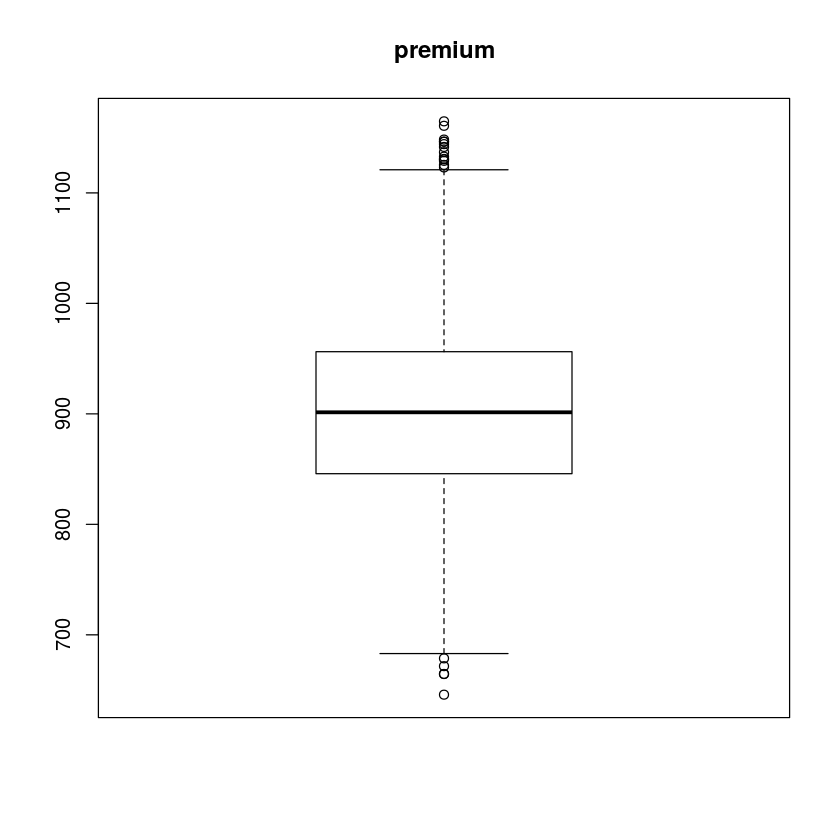

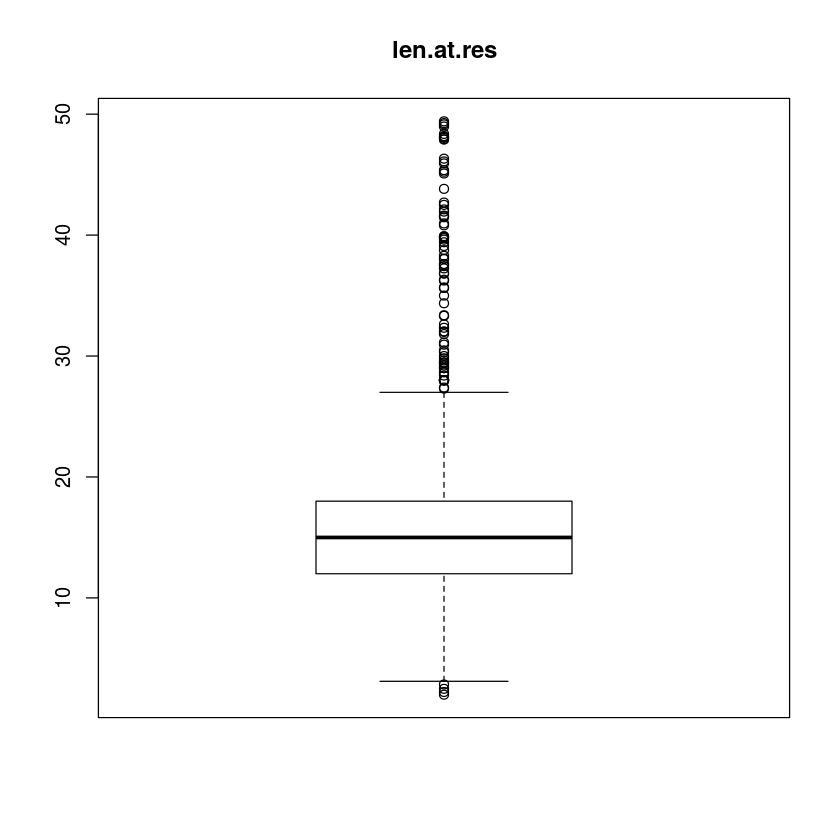

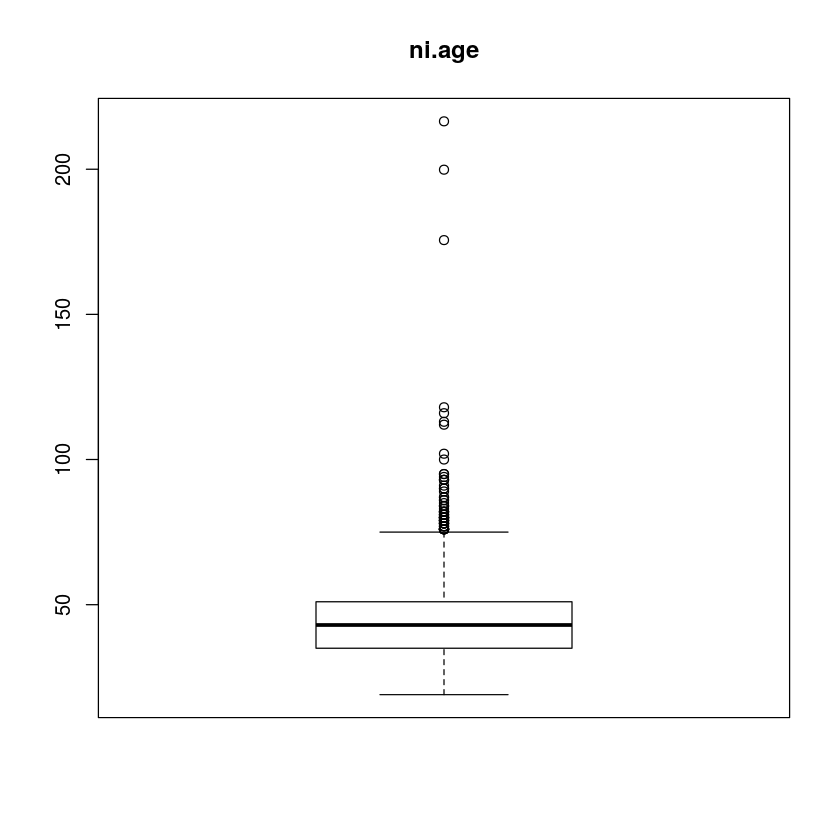

In [7]:
for (i in (2:18)) {
  if(class(train[,i])!='factor') {
    boxplot(train[,i],main = colnames(train)[i])}
  else {next}
}

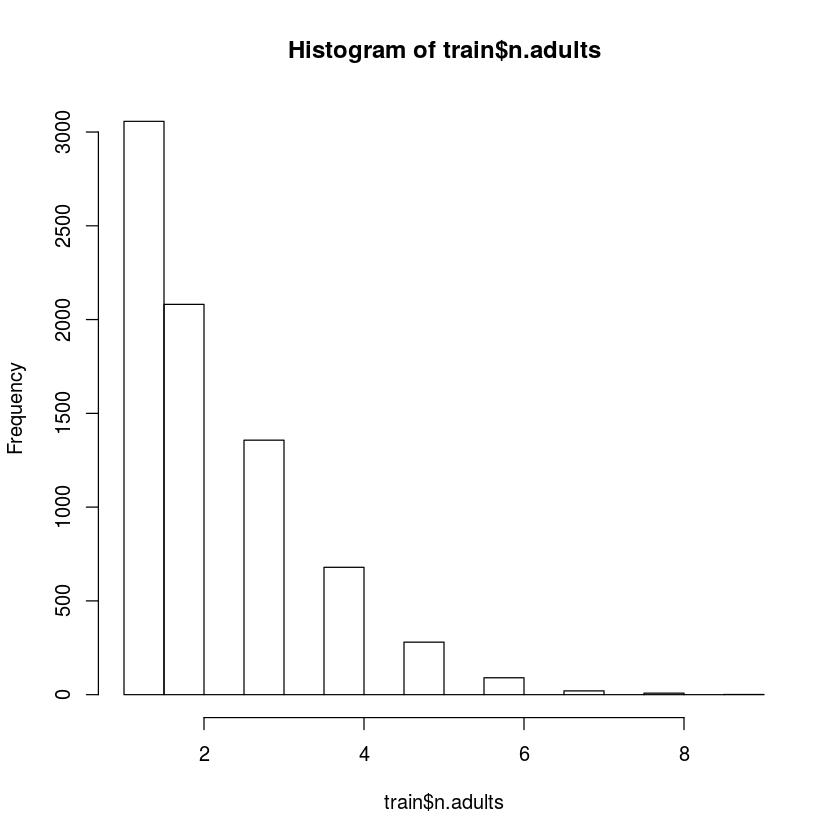

In [8]:
#n.adults
hist(train$n.adults)
#nrow(subset(train,train$n.adults>6))
train1 = subset(train,train$n.adults<=6)


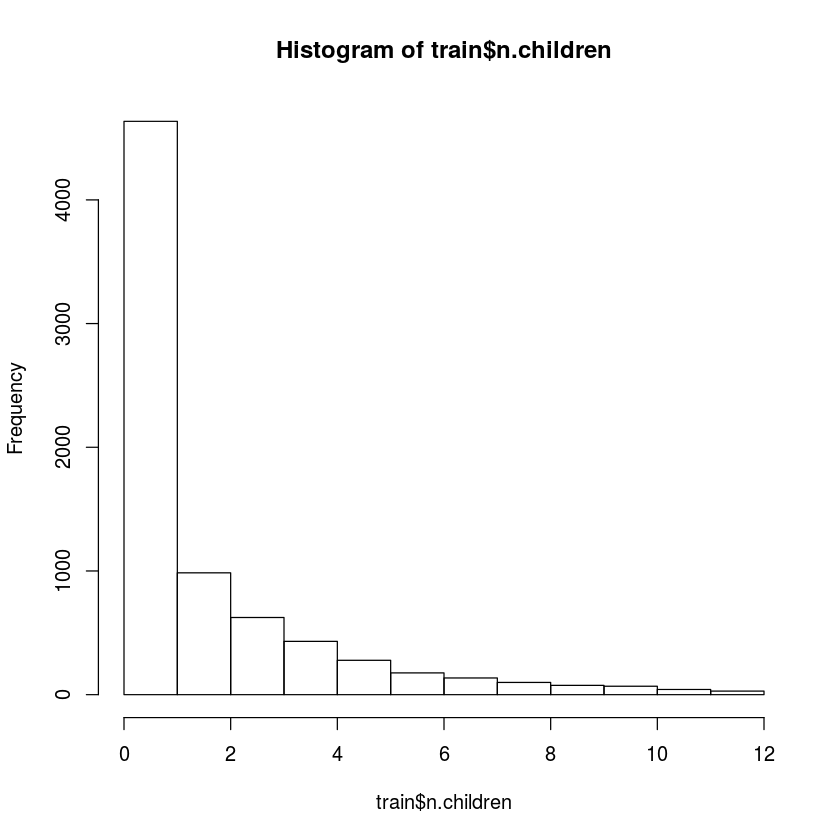

In [9]:
#n.children
hist(train$n.children)
#nrow(subset(train,train$n.children<=7))
train2 = subset(train1,train1$n.adults<=7)

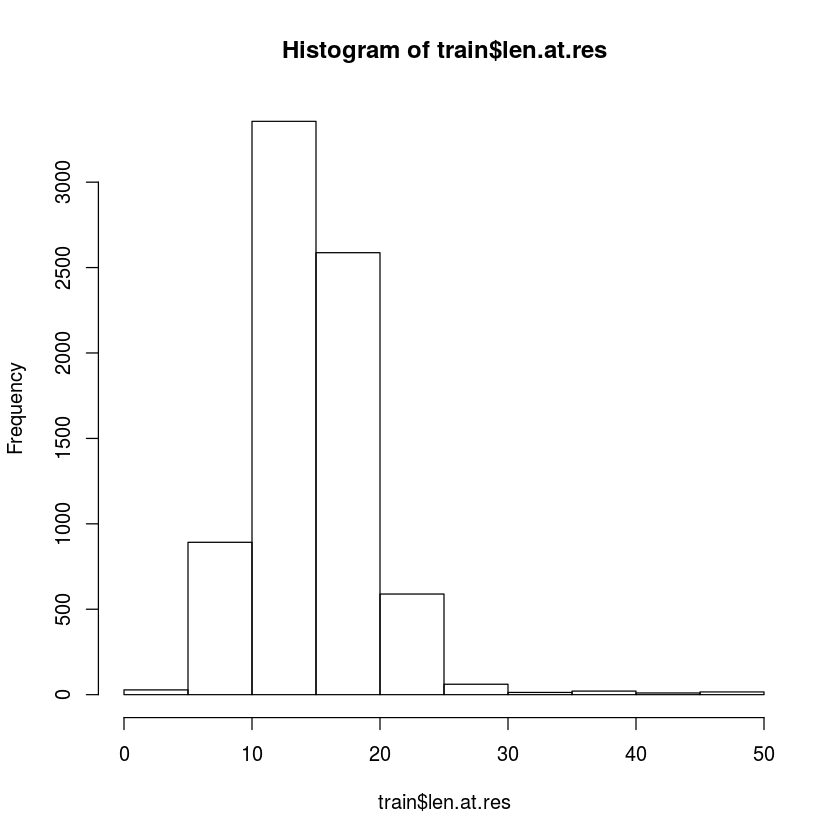

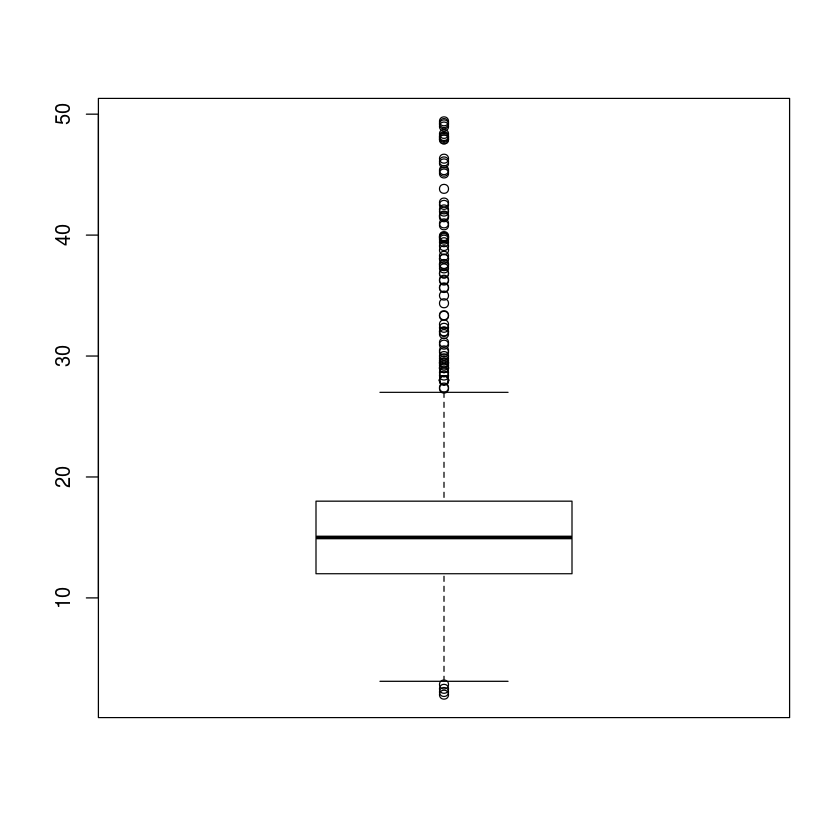

In [10]:
#len.at.res
hist(train$len.at.res)
boxplot(train$len.at.res)
#nrow(subset(train,train$len.at.res>27))
train3 = subset(train2,train2$len.at.res<=27)

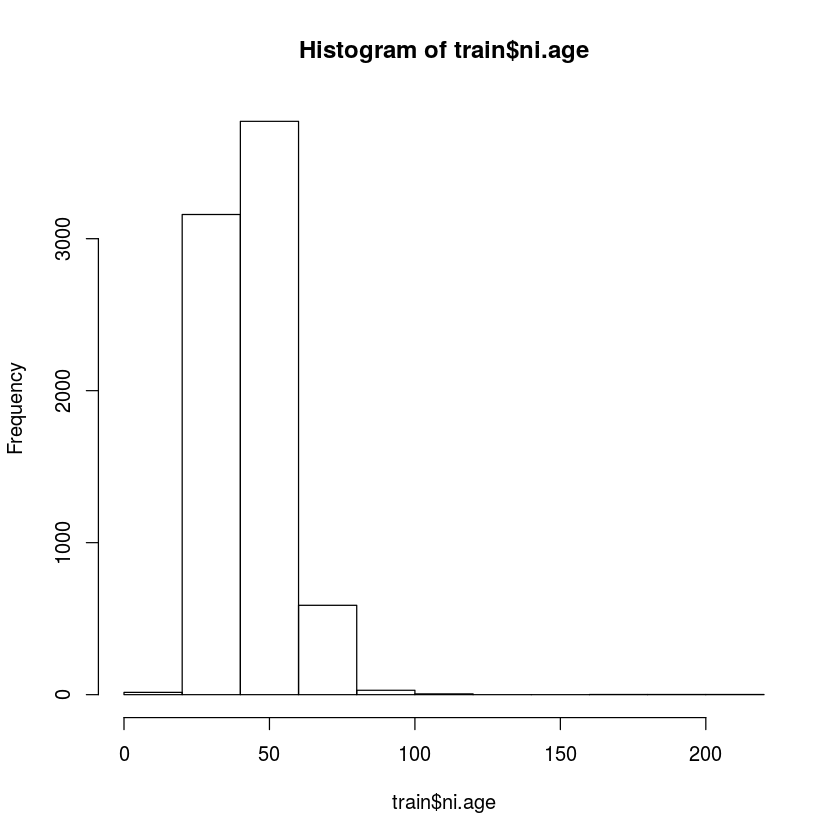

In [11]:
#ni.age
hist(train$ni.age)
#nrow(subset(train,train$ni.age>80))
train4 = subset(train3,train3$ni.age<=90)

In [12]:
for (i in (2:18)) {
  if(class(train4[,i])!='factor') {
    if (sum(is.na(train4[,i]))!=0) {
      train4[which(is.na(train4[,i])),i]=mean(train4[,i],na.rm=T)
    }
  }
  else {next}
}
summary(train4[,-c(6,9,10,11,13,14,16,17,18)])
str(train4)
head(train4)

       id           tenure        claim.ind         n.adults    
 Min.   :   1   Min.   : 0.00   Min.   :0.0000   Min.   :1.000  
 1st Qu.:1905   1st Qu.: 6.00   1st Qu.:0.0000   1st Qu.:1.000  
 Median :3794   Median :13.00   Median :0.0000   Median :2.000  
 Mean   :3796   Mean   :11.71   Mean   :0.2039   Mean   :2.113  
 3rd Qu.:5686   3rd Qu.:16.00   3rd Qu.:0.0000   3rd Qu.:3.000  
 Max.   :7582   Max.   :30.00   Max.   :1.0000   Max.   :6.000  
   n.children     ni.marital.status    premium         len.at.res   
 Min.   : 0.000   Min.   :0.0000    Min.   : 645.8   Min.   : 2.00  
 1st Qu.: 0.000   1st Qu.:0.0000    1st Qu.: 845.9   1st Qu.:12.00  
 Median : 1.000   Median :1.0000    Median : 901.4   Median :15.00  
 Mean   : 1.775   Mean   :0.7167    Mean   : 901.4   Mean   :14.96  
 3rd Qu.: 3.000   3rd Qu.:1.0000    3rd Qu.: 955.9   3rd Qu.:18.00  
 Max.   :12.000   Max.   :1.0000    Max.   :1164.8   Max.   :27.00  
     ni.age          cancel       
 Min.   :19.00   Min.   :-1

'data.frame':	7434 obs. of  19 variables:
 $ id               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ tenure           : num  12 18 4 16 14 14 19 13 11 14 ...
 $ claim.ind        : num  0 0 0 0 0 0 0 1 1 0 ...
 $ n.adults         : int  4 2 2 1 3 3 1 1 1 4 ...
 $ n.children       : num  2 0 0 0 3 0 1 0 3 1 ...
 $ ni.gender        : Factor w/ 2 levels "F","M": 1 2 2 1 2 1 1 2 1 2 ...
 $ ni.marital.status: num  1 1 0 1 1 0 0 0 1 1 ...
 $ premium          : num  896 828 1003 1092 885 ...
 $ sales.channel    : Factor w/ 3 levels "Broker","Online",..: 1 1 3 1 3 1 3 1 1 1 ...
 $ coverage.type    : Factor w/ 3 levels "A","B","C": 2 3 2 3 1 3 1 3 3 3 ...
 $ dwelling.type    : Factor w/ 3 levels "Condo","House",..: 1 3 2 1 3 2 3 1 3 2 ...
 $ len.at.res       : num  13 15 10 22 18 19 21 10 18 16 ...
 $ credit           : Factor w/ 3 levels "high","low","medium": 1 1 3 1 2 1 1 1 3 1 ...
 $ house.color      : Factor w/ 4 levels "blue","red","white",..: 1 3 1 2 3 3 3 1 2 3 ...
 $ ni.age           : num 

id,tenure,claim.ind,n.adults,n.children,ni.gender,ni.marital.status,premium,sales.channel,coverage.type,dwelling.type,len.at.res,credit,house.color,ni.age,year,zip.code,area,cancel
1,12,0,4,2,F,1,895.6156,Broker,B,Condo,13,high,blue,47,2013,80020,CO,0
2,18,0,2,0,M,1,828.3324,Broker,C,Tenant,15,high,white,47,2013,50025,IA,0
3,4,0,2,0,M,0,1003.0617,Phone,B,House,10,medium,blue,30,2013,50025,IA,0
4,16,0,1,0,F,1,1092.4482,Broker,C,Condo,22,high,red,38,2013,80026,CO,0
5,14,0,3,3,M,1,885.4742,Phone,A,Tenant,18,low,white,49,2013,50054,IA,0
6,14,0,3,0,F,0,897.3957,Broker,C,House,19,high,white,40,2013,85076,AZ,0


In [13]:
summary(train4[,c(6,9,10,11,13,14,16,17,18)])
#i=6
for (i in (2:18)) {
  if(class(train4[,i])=='factor') {
    if (sum(is.na(train4[,i]))!=0) {
      train4=subset(train4,!is.na(train4[,i]))
    }
  } 
  else {next}
} 

summary(train4)


 ni.gender   sales.channel coverage.type dwelling.type    credit    
 F   :3528   Broker:4276   A   :2532     Condo :1740   high  :4591  
 M   :3894   Online: 636   B   :1780     House :4152   low   :1222  
 NA's:  12   Phone :2510   C   :3118     Tenant:1531   medium:1610  
             NA's  :  12   NA's:   4     NA's  :  11   NA's  :  11  
                                                                    
                                                                    
                                                                    
 house.color     year         zip.code      area     
 blue  :1998   2013:1540   50021  : 194   AZ  :1759  
 red   :1820   2014:1794   80016  : 134   CO  :1403  
 white :2884   2015:1961   15025  : 128   DC  : 350  
 yellow: 726   2016:2139   50025  : 116   IA  :1971  
 NA's  :   6               80028  : 103   PA  :1152  
                           (Other):6755   wA  : 795  
                           NA's   :   4   NA's:   4  

       id           tenure        claim.ind         n.adults    
 Min.   :   1   Min.   : 0.00   Min.   :0.0000   Min.   :1.000  
 1st Qu.:1906   1st Qu.: 6.00   1st Qu.:0.0000   1st Qu.:1.000  
 Median :3796   Median :13.00   Median :0.0000   Median :2.000  
 Mean   :3798   Mean   :11.71   Mean   :0.2043   Mean   :2.116  
 3rd Qu.:5689   3rd Qu.:16.00   3rd Qu.:0.0000   3rd Qu.:3.000  
 Max.   :7582   Max.   :30.00   Max.   :1.0000   Max.   :6.000  
                                                                
   n.children     ni.gender ni.marital.status    premium       sales.channel
 Min.   : 0.000   F:3505    Min.   :0.0000    Min.   : 645.8   Broker:4244  
 1st Qu.: 0.000   M:3869    1st Qu.:0.0000    1st Qu.: 846.1   Online: 631  
 Median : 1.000             Median :1.0000    Median : 901.6   Phone :2499  
 Mean   : 1.776             Mean   :0.7164    Mean   : 901.5                
 3rd Qu.: 3.000             3rd Qu.:1.0000    3rd Qu.: 956.1                
 Max.   :12.000   

In [14]:
colnames(train4)[c(6,9,10,11,13,14,18)]

[1] "ni.gender"     "sales.channel" "coverage.type" "dwelling.type"
[5] "credit"        "house.color"   "area"

In [15]:
fmla = as.formula(paste("~",paste(colnames(train4)[c(6,9,10,11,13,14,18)],collapse = "+"),sep = ""))
fmla

~ni.gender + sales.channel + coverage.type + dwelling.type + 
    credit + house.color + area

In [16]:
dummies = model.matrix(fmla,train4)[,-1]

dummies = as.data.frame(dummies)
dummies
train5 = cbind(train4[,-c(6,9,10,11,13,14,16,17,18)],dummies)

,ni.genderM,sales.channelOnline,sales.channelPhone,coverage.typeB,coverage.typeC,dwelling.typeHouse,dwelling.typeTenant,creditlow,creditmedium,house.colorred,house.colorwhite,house.coloryellow,areaCO,areaDC,areaIA,areaPA,areawA
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
3,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
5,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0
6,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
7,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
8,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0
10,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0


In [17]:
#remove cancel -1 value
table(train$cancel)
train6 = train5[train5$cancel!=-1,]
summary(train6)


  -1    0    1 
  25 5710 1843 

       id           tenure       claim.ind         n.adults    
 Min.   :   1   Min.   : 0.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:1910   1st Qu.: 6.0   1st Qu.:0.0000   1st Qu.:1.000  
 Median :3798   Median :13.0   Median :0.0000   Median :2.000  
 Mean   :3798   Mean   :11.7   Mean   :0.2041   Mean   :2.116  
 3rd Qu.:5688   3rd Qu.:16.0   3rd Qu.:0.0000   3rd Qu.:3.000  
 Max.   :7582   Max.   :30.0   Max.   :1.0000   Max.   :6.000  
   n.children     ni.marital.status    premium         len.at.res   
 Min.   : 0.000   Min.   :0.0000    Min.   : 645.8   Min.   : 2.00  
 1st Qu.: 0.000   1st Qu.:0.0000    1st Qu.: 846.0   1st Qu.:12.00  
 Median : 1.000   Median :1.0000    Median : 901.7   Median :15.00  
 Mean   : 1.774   Mean   :0.7162    Mean   : 901.5   Mean   :14.95  
 3rd Qu.: 3.000   3rd Qu.:1.0000    3rd Qu.: 956.2   3rd Qu.:18.00  
 Max.   :12.000   Max.   :1.0000    Max.   :1164.8   Max.   :27.00  
     ni.age          cancel         ni.genderM    sales.channelOnline

In [18]:
#############standardization
head(train6)
range01 = function(x){
  (x-min(x))/(max(x)-min(x))
}
train6$tenure = range01(train6$tenure)
train6$n.adults=range01(train6$n.adults)
train6$n.children=range01(train6$n.children)
train6$premium=range01(train6$premium)
train6$len.at.res=range01(train6$len.at.res)
train6$ni.age=range01(train6$ni.age)
head(train6)

id,tenure,claim.ind,n.adults,n.children,ni.marital.status,premium,len.at.res,ni.age,cancel,⋯,creditlow,creditmedium,house.colorred,house.colorwhite,house.coloryellow,areaCO,areaDC,areaIA,areaPA,areawA
1,12,0,4,2,1,895.6156,13,47,0,⋯,0,0,0,0,0,1,0,0,0,0
2,18,0,2,0,1,828.3324,15,47,0,⋯,0,0,0,1,0,0,0,1,0,0
3,4,0,2,0,0,1003.0617,10,30,0,⋯,0,1,0,0,0,0,0,1,0,0
4,16,0,1,0,1,1092.4482,22,38,0,⋯,0,0,1,0,0,1,0,0,0,0
5,14,0,3,3,1,885.4742,18,49,0,⋯,1,0,0,1,0,0,0,1,0,0
6,14,0,3,0,0,897.3957,19,40,0,⋯,0,0,0,1,0,0,0,0,0,0


id,tenure,claim.ind,n.adults,n.children,ni.marital.status,premium,len.at.res,ni.age,cancel,⋯,creditlow,creditmedium,house.colorred,house.colorwhite,house.coloryellow,areaCO,areaDC,areaIA,areaPA,areawA
1,0.4000000,0,0.6,0.1666667,1,0.4813322,0.44,0.3943662,0,⋯,0,0,0,0,0,1,0,0,0,0
2,0.6000000,0,0.2,0.0000000,1,0.3516855,0.52,0.3943662,0,⋯,0,0,0,1,0,0,0,1,0,0
3,0.1333333,0,0.2,0.0000000,0,0.6883676,0.32,0.1549296,0,⋯,0,1,0,0,0,0,0,1,0,0
4,0.5333333,0,0.0,0.0000000,1,0.8606046,0.80,0.2676056,0,⋯,0,0,1,0,0,1,0,0,0,0
5,0.4666667,0,0.4,0.2500000,1,0.4617910,0.64,0.4225352,0,⋯,1,0,0,1,0,0,0,1,0,0
6,0.4666667,0,0.4,0.0000000,0,0.4847622,0.68,0.2957746,0,⋯,0,0,0,1,0,0,0,0,0,0


In [19]:
# proportion of our outcome variable
prop.table(table(train6$cancel))



        0         1 
0.7546605 0.2453395 

In [20]:
library(caTools)

In [21]:
c

function (...)  .Primitive("c")

In [30]:

############split train,validation and test 
model =train6
set.seed(123)
split_train = sample.split(model,SplitRatio = .6)
training_set = subset(model,split_train==TRUE)
validation_set = subset(model,split_train==FALSE)
testing_set = subset(model,split_train==FALSE)
#split_train2 = sample.split(validation,SplitRatio = .5)
#validation_set = subset(validation,split_train2==TRUE)
#testing_set = subset(validation,split_train2==FALSE)

In [31]:
library(ROCR)
library(gplots)

In [32]:
############model part
### 1. glm 
formula = as.formula(paste("cancel~",paste(colnames(model)[-c(1,10)],collapse = "+"),sep = ""))
fit = glm(formula,training_set,family = "binomial")
summary(fit)

predicted.value.train = predict(fit,training_set,type = "response")
predicted.value.validation = predict(fit,validation_set,type = "response")
predicted.value.test = predict(fit,testing_set,type = "response")

pred = prediction(predicted.value.test,testing_set$cancel)


Call:
glm(formula = formula, family = "binomial", data = training_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9749  -0.7307  -0.5321  -0.3053   2.5567  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.6361964  0.2582171  -6.337 2.35e-10 ***
tenure               0.5178012  0.2520053   2.055  0.03991 *  
claim.ind            0.4377445  0.0910560   4.807 1.53e-06 ***
n.adults             0.4381422  0.1552603   2.822  0.00477 ** 
n.children           1.6550077  0.1999118   8.279  < 2e-16 ***
ni.marital.status   -0.2926698  0.0928371  -3.153  0.00162 ** 
premium             -0.0737977  0.2564199  -0.288  0.77350    
len.at.res          -0.6195071  0.2463785  -2.514  0.01192 *  
ni.age              -1.2751887  0.3261570  -3.910 9.24e-05 ***
ni.genderM          -0.0444433  0.0764677  -0.581  0.56110    
sales.channelOnline  0.6704689  0.1352148   4.959 7.10e-07 ***
sales.channelPhone   0.9231974  0.0811300  

In [33]:
result = function(pred, y){
    pred[pred<0.5]=0
    pred[pred>0.5]=1
    head(pred)
    result = data.frame(pred,y)
    print(prop.table(table(result)))
    print(prop.table(table(result))[1]+prop.table(table(result))[4])
}

In [34]:
result(predicted.value.train, training_set$cancel)
result(predicted.value.validation, validation_set$cancel)

    y
pred          0          1
   0 0.72990354 0.19269637
   1 0.02985760 0.04754249
[1] 0.777446
    y
pred          0          1
   0 0.71585977 0.20767947
   1 0.03138564 0.04507513
[1] 0.7609349


In [35]:
AUC =performance(pred,"auc")
print(AUC@y.values)

[[1]]
[1] 0.7250795



In [36]:
library(caret)
library(glmnet)

Loading required package: lattice
Loading required package: ggplot2
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-13



In [37]:
predictname = as.matrix(training_set[-c(1,10)])
fit2 = train(predictname,training_set$cancel, method='glmnet',  metric = "RMSE") 
#summary(fit2)
predicted2.value.train = predict(fit2, training_set)
predicted2.value.validation = predict(fit2, validation_set)
predicted2.value.test = predict(fit2, testing_set)

##########c-statistic
pred = prediction(predicted2.value.test,testing_set$cancel)




Warning message in train.default(predictname, training_set$cancel, method = "glmnet", :
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”

In [38]:
result(predicted2.value.train, training_set$cancel)
result(predicted2.value.validation, validation_set$cancel)

    y
pred          0          1
   0 0.74368397 0.20923289
   1 0.01607717 0.03100597
[1] 0.7746899
    y
pred          0          1
   0 0.72721202 0.22404007
   1 0.02003339 0.02871452
[1] 0.7559265


In [39]:
AUC =performance(pred,"auc")
print(AUC@y.values)

[[1]]
[1] 0.7242401



In [40]:
library(e1071)

In [41]:
formula = as.formula(paste("cancel~",paste(colnames(model)[-c(1,10)],collapse = "+"),sep = ""))
model.svm <- svm(formula, training_set, cost = 1)

In [42]:
predicted3.value.train = predict(model.svm, training_set, type = "response")
predicted3.value.validation = predict(model.svm, validation_set, type = "response")
predicted3.value.test = predict(model.svm, testing_set, type = "response")

pred = prediction(predicted3.value.test,testing_set$cancel)

In [43]:
result(predicted3.value.train, training_set$cancel)
result(predicted3.value.validation, validation_set$cancel)

    y
pred           0           1
   0 0.753559945 0.201653652
   1 0.006201194 0.038585209
[1] 0.7921452
    y
pred          0          1
   0 0.73489149 0.23305509
   1 0.01235392 0.01969950
[1] 0.754591
